In [1]:
pip install ST_DBSCAN

Note: you may need to restart the kernel to use updated packages.


In [3]:
%matplotlib inline
import ipywidgets
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from st_dbscan import ST_DBSCAN
import matplotlib.colors as mpl_colors


DATA = pd.read_csv("sick_reviews.csv")
DATA.head()
df_X = DATA[['latitude','longitude']]
df_X.to_csv('latlong.csv')

In [4]:
from datetime import datetime
df = pd.DataFrame()
df = DATA
date = pd.to_datetime(df['date'])
date

0       2012-12-06 17:14:21
1       2016-05-20 05:40:25
2       2012-06-30 18:32:20
3       2014-05-27 01:07:26
4       2016-09-06 05:46:17
                ...        
12219   2011-10-24 04:09:23
12220   2016-11-21 13:52:13
12221   2018-10-21 04:16:42
12222   2017-11-05 00:31:29
12223   2018-07-06 22:55:33
Name: date, Length: 12224, dtype: datetime64[ns]

In [5]:
df['date'] = date
print(df['date'].min())
print(df['date'].max())
print(df['date'] - df['date'].min())
print((df['date'].max() - df['date'].min()))




2005-12-28 20:28:33
2018-11-14 15:28:32
0       2534 days 20:45:48
1       3795 days 09:11:52
2       2375 days 22:03:47
3       3071 days 04:38:53
4       3904 days 09:17:44
               ...        
12219   2125 days 07:40:50
12220   3980 days 17:23:40
12221   4679 days 07:48:09
12222   4329 days 04:02:56
12223   4573 days 02:27:00
Name: date, Length: 12224, dtype: timedelta64[ns]
4703 days 18:59:59


In [6]:
df.dtypes

Unnamed: 0               int64
Unnamed: 0.1             int64
name                    object
address                 object
city                    object
state                   object
postal_code            float64
latitude               float64
longitude              float64
text                    object
date            datetime64[ns]
score                  float64
dtype: object

In [7]:
print(df['latitude'].min())
print(df['latitude'].max())
print((df['latitude'].max() - df['latitude'].min()))
print(df['longitude'].min())
print(df['longitude'].max())

33.2178145
43.252157700000005
10.034343200000002
-115.4354310036
-79.65014920000002


In [8]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [9]:
import geopy.distance

coords_1 = (33.2178145,-115.4354310036 )
coords_2 = (43.252157700000005, -79.65014920000002)

print(geopy.distance.vincenty(coords_1, coords_2).km)

3295.434593709583


/Users/zainabazizzaveri/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  


In [113]:
# normalize the data
df['latitude'] = (df['latitude'] - df['latitude'].min()) / (df['latitude'].max() - df['latitude'].min())

In [114]:
df['longitude'] = (df['longitude'] - df['longitude'].min()) / (df['longitude'].max() - df['longitude'].min())

In [115]:
df['date'] = (df['date'] - df['date'].min()) / (df['date'].max() - df['date'].min())

In [13]:
# transform to numpy array
data = df.loc[:, ['date','latitude','longitude']].values

In [125]:
import math
n = 7099
min_samples = 8*math.log(n)
min_samples

70.94167366431509

In [162]:
st_dbscan = ST_DBSCAN(eps1 = 0.05, eps2 = 0.00063789, min_samples = 9) 
# for list of all parameter description see - src code comments

In [163]:
st_dbscan.fit(data)

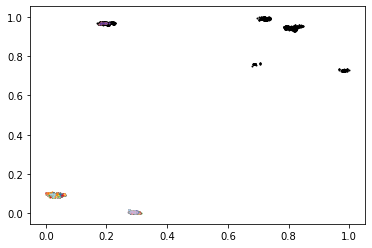

In [164]:
def plot(data, labels):
    colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a']
    
    for i in range(-1, len(set(labels))):
        if i == -1:
            col = [0, 0, 0, 1]
        else:
            col = colors[i % len(colors)]
        
        clust = data[np.where(labels==i)]
        plt.scatter(clust[:,0], clust[:,1], c=[col], s=1)
    plt.show()

    return None

plot(data[:,1:], st_dbscan.labels)

In [165]:
df['cluster'] = st_dbscan.labels.tolist()
df['cluster'].unique()

array([ -1,   0,   1,   2,   3,   4,   5,   6, 126,   7,  38,   8,   9,
        10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,  28,  29,  30,  31, 100, 119,  42,  32,
        33,  67,  79,  34,  35,  36,  37,  39,  40,  72, 116,  89,  41,
       113,  43,  44,  45,  46,  90,  62,  47,  48,  96,  49,  50,  51,
        52,  53,  64,  78,  58,  86,  54,  55,  56,  57, 114,  59,  60,
        61, 115,  81,  76,  63, 117,  65, 124, 105,  66,  68,  77,  69,
       120,  70,  71,  73,  74,  75, 103,  98, 128, 118, 102,  80,  82,
        83,  84,  94,  85, 129, 121,  88,  93,  87, 123,  91, 104, 127,
       122,  92, 101,  95,  97, 111, 106,  99, 112, 130, 109, 107, 108,
       110, 125])

In [166]:
df['date'] = date

In [167]:
plt.clf()
# This section filters out columns
# Options to be removed are initializaed in tuples. Simply felt better because tuples are immutable.
x_irrelevant_options = ('Unnamed: 0', 'Unnamed: 1', 'name')
y_irrelevant_options = ('Unnamed: 0', 'Unnamed: 1', 'name')
x_axis_options = [e for e in df.columns if e not in x_irrelevant_options]
y_axis_options = [e for e in df.columns if e not in y_irrelevant_options]

# This section generates the widget itself
@ipywidgets.interact(x = x_axis_options, y= y_axis_options, colormap = plt.colormaps(),sym_log = True)
def plot(x = 'longitude',y = 'latitude', colormap = 'jet',sym_log = True):
    if sym_log:
        norm = mpl_colors.SymLogNorm(10)
    else:
        norm = mpl_colors.Normalize()
        
    fig, ax = plt.subplots(figsize=(16,9))
    CAX = ax.scatter(df[x],df[y], cmap=colormap, norm = norm, c=(df['cluster']))
    fig.suptitle('test', fontsize=23)
    plt.xlabel(x, fontsize=18)
    plt.ylabel(y, fontsize=18)
    plt.colorbar(CAX, extend = 'both')
    # Rotates the x-axis labels if they are object(s) like 'shape' or 'city' to promote readability
    if df[x].dtype == 'object':
        plt.xticks(rotation=90)
    elif df[x].dtype == 'float64':
        plt.xticks(rotation=0)

    plt.show()

<Figure size 432x288 with 0 Axes>

interactive(children=(Dropdown(description='x', index=5, options=('address', 'city', 'state', 'postal_code', '…

In [168]:
a = df.groupby('cluster').agg({'cluster':'count','date': ['min','max'], 'state':['min','max']})
a

cluster                date                     state    
          count                 min                 max   min max
cluster                                                          
-1         4172 2005-12-28 20:28:33 2018-11-14 15:28:32    AZ  WI
 0          114 2016-04-14 04:21:09 2016-06-01 04:36:01    AZ  AZ
 1           31 2014-05-24 15:20:26 2014-06-12 02:20:54    AZ  AZ
 2           69 2016-08-28 17:04:02 2016-09-29 01:41:51    AZ  AZ
 3          693 2017-02-05 20:20:44 2017-09-30 04:18:14    NV  NV
...         ...                 ...                 ...   ...  ..
 126          7 2016-10-02 23:24:00 2016-10-06 23:01:19    AZ  AZ
 127          9 2013-09-30 16:17:37 2013-10-05 06:00:52    AZ  AZ
 128         12 2014-12-05 04:14:12 2014-12-12 09:37:24    NV  NV
 129          9 2018-04-06 00:49:49 2018-04-11 23:34:48    NC  SC
 130          9 2014-08-29 05:05:00 2014-09-03 15:27:04    AZ  AZ

[132 rows x 5 columns]

In [169]:
a.to_csv("/Users/zainabazizzaveri/Downloads/tables/table0.05-3-9.csv")